In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [3]:
os.getcwd()

'/scratch/agd387/RDS_Project/notebooks'

In [5]:
bureau = pd.read_csv('/scratch/agd387/home-credit-default-risk/bureau.csv')

In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


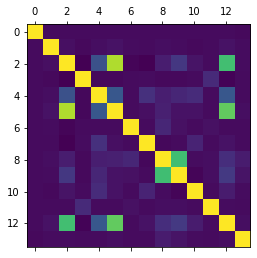

In [19]:
plt.matshow(bureau.corr())
plt.show()

In [22]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


<AxesSubplot:>

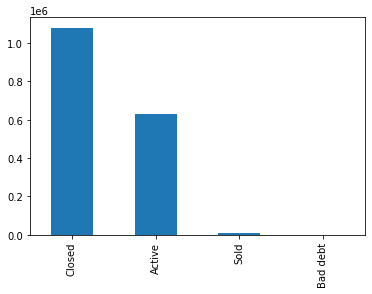

In [10]:
bureau['CREDIT_ACTIVE'].value_counts().plot(kind='bar')

<AxesSubplot:>

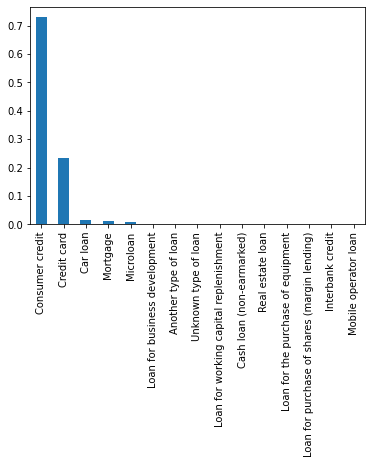

In [13]:
bureau['CREDIT_TYPE'].value_counts(normalize=True).plot(kind='bar')

In [2]:
df = pd.read_csv('/scratch/agd387/rds_df.csv')

In [3]:
df.shape

(356250, 663)

In [4]:
df.dtypes.value_counts()

float64    636
int64       27
dtype: int64

In [6]:
import numpy as np
lgbm_categorical_feat = [
        'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
        'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'WALLSMATERIAL_MODE']

In [42]:
for col in df.columns[2:]:
    if df[col].dtype == np.int64 and col in lgbm_categorical_feat:
        print(df[col].value_counts())
        print('-'*60)

0    326536
1     29714
Name: NAME_CONTRACT_TYPE, dtype: int64
------------------------------------------------------------
1    235125
0    121125
Name: CODE_GENDER, dtype: int64
------------------------------------------------------------
0    235232
1    121018
Name: FLAG_OWN_CAR, dtype: int64
------------------------------------------------------------
 0    288249
 1     46029
 2     12818
 3      3675
-1      2203
 5      1981
 4       975
 6       320
Name: NAME_TYPE_SUITE, dtype: int64
------------------------------------------------------------
0    183303
2     83018
3     64635
1     25235
4        23
5        20
6        11
7         5
Name: NAME_INCOME_TYPE, dtype: int64
------------------------------------------------------------
0    252376
1     87378
2     12000
3      4291
4       205
Name: NAME_EDUCATION_TYPE, dtype: int64
------------------------------------------------------------
1    228711
0     52480
2     34035
4     22725
3     18297
5         2
Name: NAME_FA

In [22]:
num_cols = [col for col in df.columns if(df[col].dtype==np.float64)][1:6]

In [23]:
subset = df[num_cols]

In [48]:
pd.options.display.float_format = '{:,}'.format
print(subset.describe().round(decimals=2).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  AMT\_INCOME\_TOTAL &  AMT\_CREDIT &  AMT\_ANNUITY &  AMT\_GOODS\_PRICE &  REGION\_POPULATION\_RELATIVE \\
\midrule
count &         356,250.0 &   356,250.0 &    356,214.0 &        355,972.0 &                   356,250.0 \\
mean  &        169,787.93 &   587,769.6 &    27,425.65 &        528,021.4 &                        0.02 \\
std   &        107,898.82 &  398,625.86 &    14,732.88 &       366,066.16 &                        0.01 \\
min   &          25,650.0 &    45,000.0 &      1,615.5 &         40,500.0 &                         0.0 \\
25\%   &         112,500.0 &   270,000.0 &     16,731.0 &        234,000.0 &                        0.01 \\
50\%   &         153,000.0 &   500,211.0 &     25,078.5 &        450,000.0 &                        0.02 \\
75\%   &         202,500.0 &   797,557.5 &     34,960.5 &        675,000.0 &                        0.03 \\
max   &      18,000,090.0 & 4,050,000.0 &    258,025.5 &      4,050,000.0 &                   

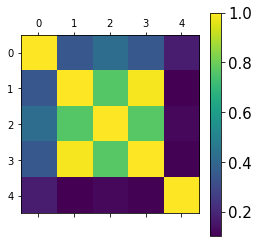

In [38]:
num_cols = [col for col in df.columns if(df[col].dtype==np.float64)][1:6]
plt.matshow(df[num_cols].corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.show()